# NLP - Case Study Based Challenge 4 - Identify Sarcasm

**Importing required libraries**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv("/content/train data.csv")
df_train.head()

,Id,article_link,headline,is_sarcastic
0,2347,https://www.huffingtonpost.com/entry/best-song...,the 23 best songs of 2014,0
1,26516,https://www.theonion.com/sesame-street-mourns-...,sesame street mourns death of original letter k,1
2,2576,https://www.huffingtonpost.com/entry/super-bow...,san francisco vandals keep messing with super ...,0
3,25464,https://local.theonion.com/area-man-cant-remem...,area man can't remember whether he rented mimi...,1
4,9030,https://local.theonion.com/fourth-grade-teache...,fourth-grade teacher receives dark portent of ...,1


In [3]:
df_test = pd.read_csv("/content/test data.csv")
df_test.head()

,Id,article_link,headline
0,18504,https://www.theonion.com/woman-relieved-soulma...,woman relieved soulmate turned out to be in sa...
1,20811,https://www.huffingtonpost.com/entry/end-the-i...,end the international drug war to control the ...
2,20419,https://www.huffingtonpost.com/entry/donald-tr...,who said it: renowned racist george wallace or...
3,20631,https://local.theonion.com/struggling-local-th...,struggling local theater space put out of its ...
4,1921,https://www.theonion.com/graffiti-artist-no-lo...,graffiti artist no longer putting his heart in it


**Combined train and test data**

In [4]:
df = pd.concat([df_train, df_test])

df.head()

,Id,article_link,headline,is_sarcastic
0,2347,https://www.huffingtonpost.com/entry/best-song...,the 23 best songs of 2014,0.0
1,26516,https://www.theonion.com/sesame-street-mourns-...,sesame street mourns death of original letter k,1.0
2,2576,https://www.huffingtonpost.com/entry/super-bow...,san francisco vandals keep messing with super ...,0.0
3,25464,https://local.theonion.com/area-man-cant-remem...,area man can't remember whether he rented mimi...,1.0
4,9030,https://local.theonion.com/fourth-grade-teache...,fourth-grade teacher receives dark portent of ...,1.0


**Dropped unwanted column**

In [5]:
df = df.drop('article_link', axis  = 1)
df.head()

,Id,headline,is_sarcastic
0,2347,the 23 best songs of 2014,0.0
1,26516,sesame street mourns death of original letter k,1.0
2,2576,san francisco vandals keep messing with super ...,0.0
3,25464,area man can't remember whether he rented mimi...,1.0
4,9030,fourth-grade teacher receives dark portent of ...,1.0


In [6]:
df1 = df

In [7]:
df1 = df1.drop('Id', axis  = 1)
df1.head()

,headline,is_sarcastic
0,the 23 best songs of 2014,0.0
1,sesame street mourns death of original letter k,1.0
2,san francisco vandals keep messing with super ...,0.0
3,area man can't remember whether he rented mimi...,1.0
4,fourth-grade teacher receives dark portent of ...,1.0


**Let's check number of rows and columns**

In [8]:
df1.shape

(26709, 2)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26709 entries, 0 to 5341
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   headline      26709 non-null  object 
 1   is_sarcastic  21367 non-null  float64
dtypes: float64(1), object(1)
memory usage: 626.0+ KB


**Dropping Missing values**

In [10]:
df1 = df1.dropna()

print (df1)

                                                headline  is_sarcastic
0                              the 23 best songs of 2014           0.0
1        sesame street mourns death of original letter k           1.0
2      san francisco vandals keep messing with super ...           0.0
3      area man can't remember whether he rented mimi...           1.0
4      fourth-grade teacher receives dark portent of ...           1.0
...                                                  ...           ...
21362  classmates take field trip to girl's adoption ...           0.0
21363           guy in audience shouts out perfect thing           1.0
21364  government watchdog agrees to investigate trum...           0.0
21365                      china is eating trump's lunch           0.0
21366  a socal brunch spot was caught using popeyes c...           0.0

[21367 rows x 2 columns]


In [11]:
df1.isnull().sum()

headline        0
is_sarcastic    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


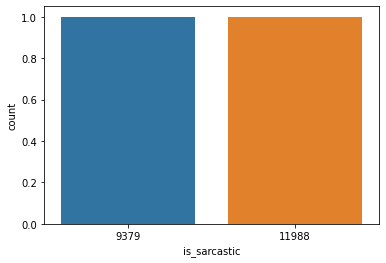

In [12]:
sns.countplot(df1['is_sarcastic'].value_counts())

**Importing NLP libraries**

In [13]:
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
import spacy
import nltk

**Using Lemmatization lib to make words as per dictionary/original words**

In [14]:
nlp = spacy.load('en_core_web_sm')
def preprocess(text):
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc]
    a_lemmas = [lemma.lower() for lemma in lemmas if lemma.isalpha() and lemma not in stopwords.words('english')]
    lemmatized_text = ' '.join(a_lemmas)
    return lemmatized_text

**cleaning the text data**

In [15]:
nltk.download("stopwords")
cleaned_text = []
for text in df1.headline:
    cleaned_text.append(preprocess(text))
df1['clean_text'] = cleaned_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


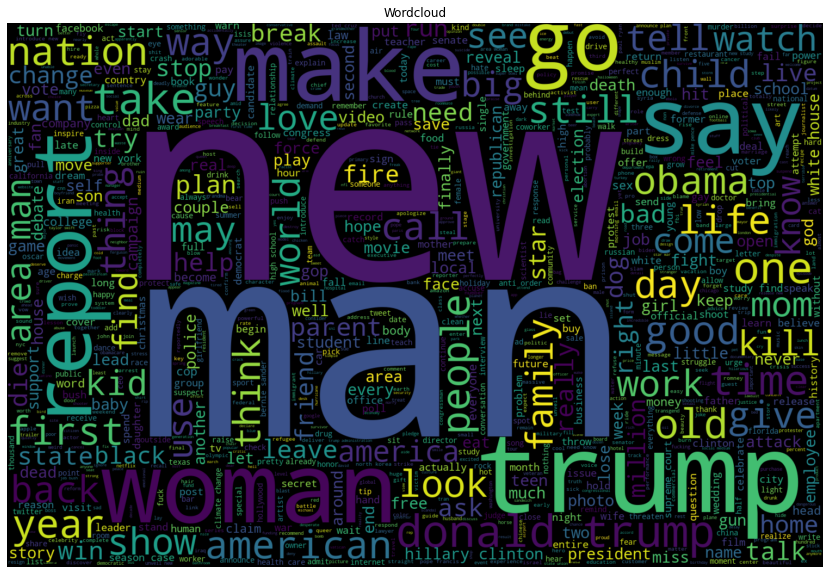

In [16]:
from wordcloud import WordCloud
plt.figure(figsize = (20,10))
wc = WordCloud(width = 1500,height = 1000,max_words = 1000).generate(' '.join(word for word in df1.clean_text))
plt.axis("off")
plt.title('Wordcloud')
plt.imshow(wc , interpolation = 'bilinear')

**Let's define X and y and fit the data**

In [17]:
X = df1.clean_text
y = df1.is_sarcastic

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
def print_metrices(pred,true):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred,))
    print("Accuracy : ",accuracy_score(pred,true))
    print("Precison : ",precision_score(pred,true, average = 'weighted'))
    print("Recall : ",recall_score(pred,true,  average = 'weighted'))
    print("F1 : ",f1_score(pred,true,  average = 'weighted'))

**Splitting the data into train and test**

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

**create the object of tfid vectorizer and do fit and transform**

In [21]:
tfidf = TfidfVectorizer(ngram_range = (1,3))
X_tfidf_train = tfidf.fit_transform(X_train.tolist())
X_tfidf_test = tfidf.transform(X_test.tolist())

In [22]:
X_train.head()

8935     exile artist iraq paint ancient illustrate man...
1598                           question real life hero ask
13827                                     guide sex beyond
21173                   rise walk fun fitness social trend
13194            child fond memory time dad try make thing
Name: clean_text, dtype: object

**Multinomial Naive Bayes : Its is used when we have discrete data (e.g. movie ratings ranging 1 and 5 as each rating will have certain frequency to represent). In text learning we have the count of each word to predict the class or label.**

In [23]:
clf_nb = MultinomialNB()
clf_nb.fit(X_tfidf_train,y_train)
y_pred_nb = clf_nb.predict(X_tfidf_test)
print_metrices(y_pred_nb,y_test)

[[3395  211]
 [1405 1400]]
              precision    recall  f1-score   support

         0.0       0.71      0.94      0.81      3606
         1.0       0.87      0.50      0.63      2805

    accuracy                           0.75      6411
   macro avg       0.79      0.72      0.72      6411
weighted avg       0.78      0.75      0.73      6411

Accuracy :  0.7479332397441897
Precison :  0.8303227182182766
Recall :  0.7479332397441897
F1 :  0.764108242226138


**Using Deep Learning to solve the problem**

In [24]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [25]:
max_words = 1000
max_len = 100
tokenizer = Tokenizer(num_words = max_words,oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
train_sequences = tokenizer.texts_to_sequences(X_train)
train_padded_sequences = pad_sequences(train_sequences,maxlen = max_len,padding = 'post')

test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded_sequences = pad_sequences(test_sequences,maxlen = max_len,padding = 'post')

**pad_sequences is used to ensure that all sequences in a list have the same length. By default this is done by padding 0 in the beginning of each sequence until each sequence has the same length as the longest sequence.**

In [26]:
print(train_sequences[0])
print(train_padded_sequences[0])

[1, 493, 509, 1, 1, 1, 1]
[  1 493 509   1   1   1   1   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [27]:
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding,GlobalAveragePooling1D
from keras.models import Model
from keras.models import Sequential

In [28]:
import numpy as np
training_padded = np.array(train_padded_sequences)
training_labels = np.array(y_train)
testing_padded = np.array(test_padded_sequences)
testing_labels = np.array(y_test)

In [29]:
vocab_size = 10000
embedding_dim = 16

**first layer should be the Embedding layer**

In [30]:
Model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_len),
    GlobalAveragePooling1D(),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')
])
Model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [31]:
Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [32]:
num_epochs = 30
history = Model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
468/468 - 4s - loss: 0.6867 - accuracy: 0.5557 - val_loss: 0.6835 - val_accuracy: 0.5625 - 4s/epoch - 9ms/step
Epoch 2/30
468/468 - 3s - loss: 0.6780 - accuracy: 0.5641 - val_loss: 0.6606 - val_accuracy: 0.5821 - 3s/epoch - 6ms/step
Epoch 3/30
468/468 - 2s - loss: 0.6181 - accuracy: 0.6724 - val_loss: 0.5842 - val_accuracy: 0.6857 - 2s/epoch - 4ms/step
Epoch 4/30
468/468 - 2s - loss: 0.5394 - accuracy: 0.7326 - val_loss: 0.5383 - val_accuracy: 0.7155 - 2s/epoch - 3ms/step
Epoch 5/30
468/468 - 2s - loss: 0.4982 - accuracy: 0.7556 - val_loss: 0.5255 - val_accuracy: 0.7284 - 2s/epoch - 3ms/step
Epoch 6/30
468/468 - 1s - loss: 0.4813 - accuracy: 0.7642 - val_loss: 0.5217 - val_accuracy: 0.7312 - 1s/epoch - 3ms/step
Epoch 7/30
468/468 - 2s - loss: 0.4729 - accuracy: 0.7673 - val_loss: 0.5197 - val_accuracy: 0.7380 - 2s/epoch - 3ms/step
Epoch 8/30
468/468 - 2s - loss: 0.4677 - accuracy: 0.7729 - val_loss: 0.5210 - val_accuracy: 0.7389 - 2s/epoch - 4ms/step
Epoch 9/30
468/468 - 3s 

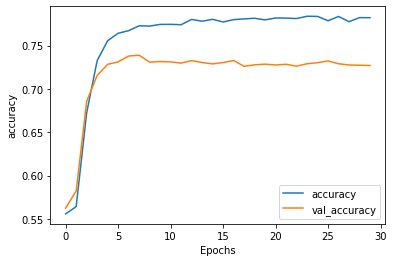

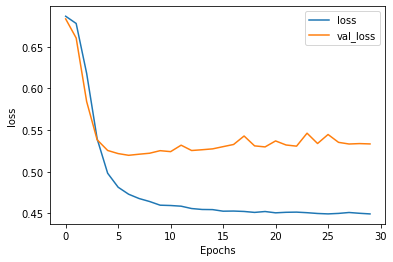

In [33]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")